Upload your kaggle.json file now:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908
License(s): ODbL-1.0
airplane-crashes-since-1908.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Airplane_Crashes_and_Fatalities_Since_1908.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Dataset loaded. Shape: (5268, 13)
         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Priva

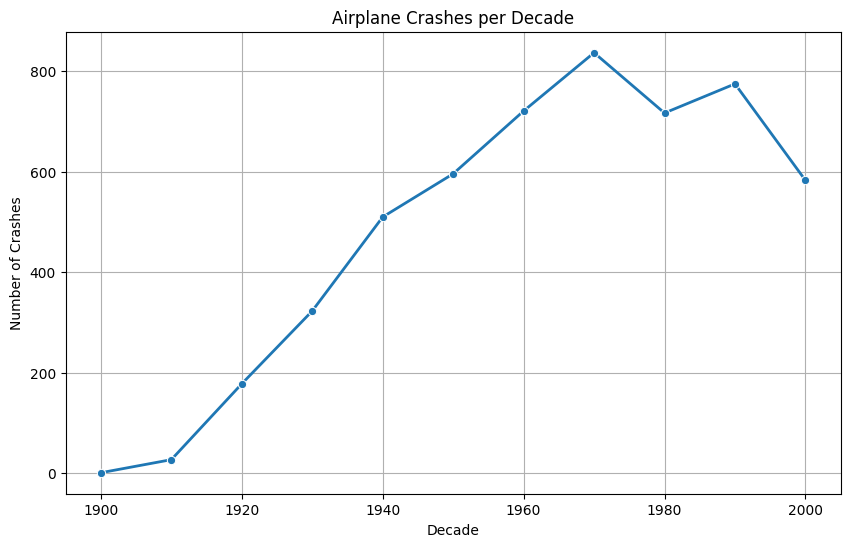

<Figure size 1200x600 with 0 Axes>

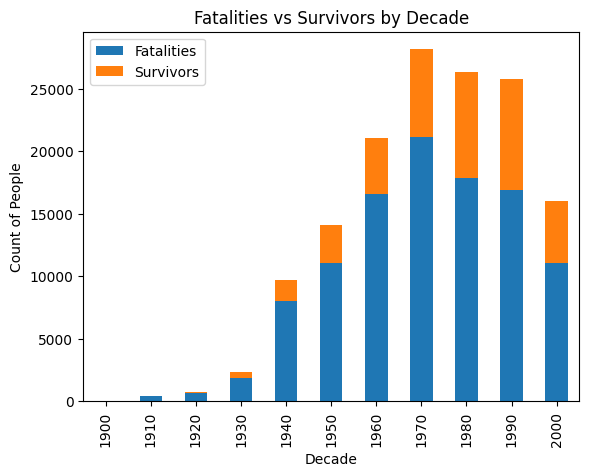

/tmp/ipython-input-3426335636.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette='viridis')


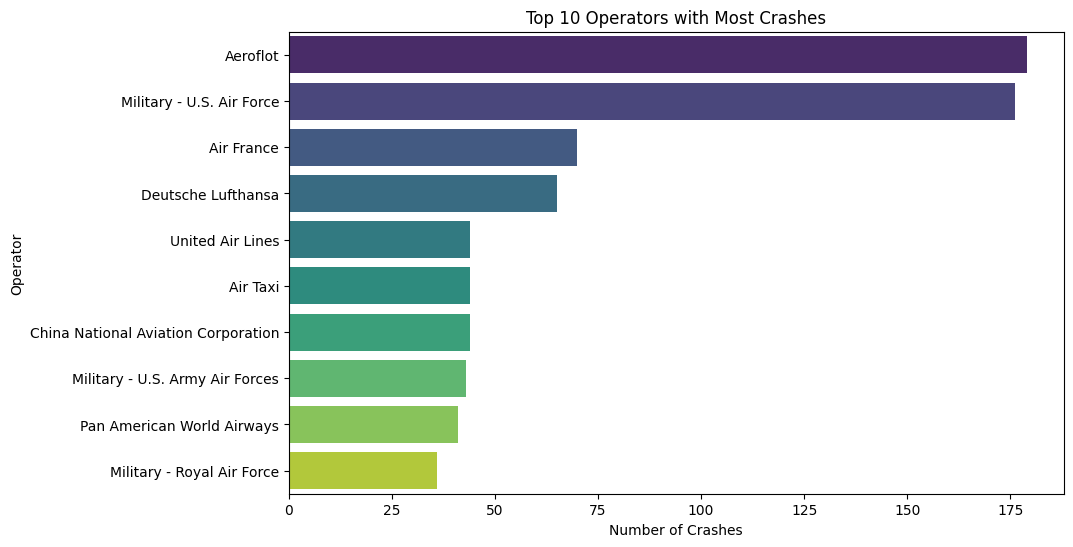

/tmp/ipython-input-3426335636.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette='magma')


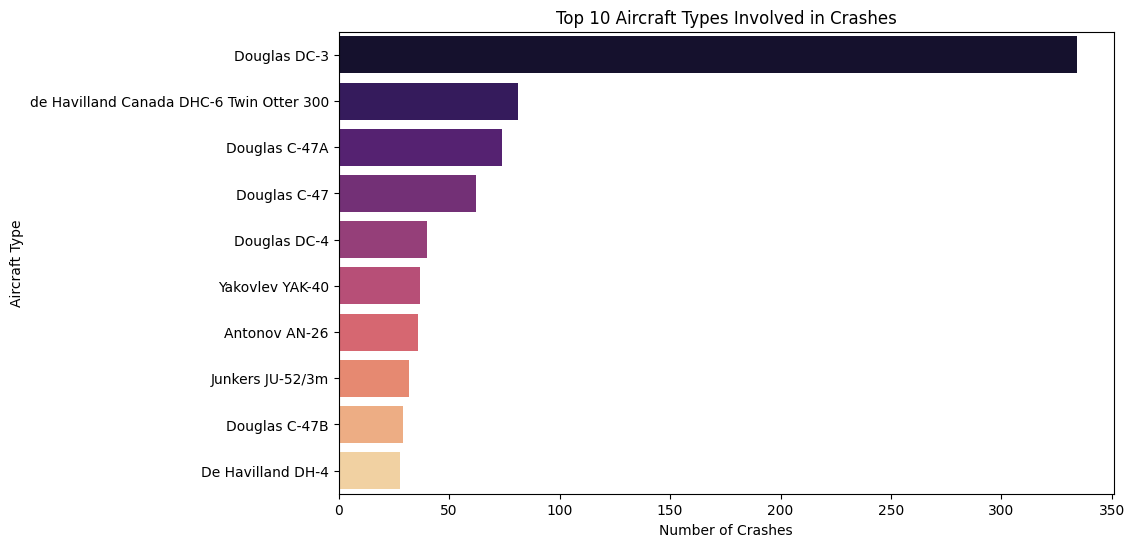

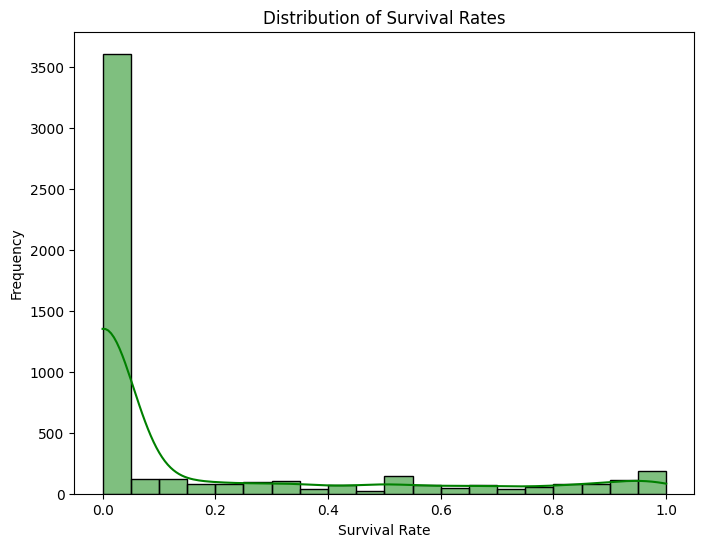


===== KEY INSIGHTS =====
Total Crashes Recorded: 5268
Most crashes occurred in the decade: 1970
Top Airline by crashes: Aeroflot with 179 crashes
Top Aircraft Type in crashes: Douglas DC-3
Aviation safety improved significantly after 1980s with a visible decline in crashes.
Survival rates vary widely, with many crashes historically having 0% survival.


In [ ]:
# ==============================
# Airplane Crashes Analysis - Ready for Google Colab
# ==============================

# Step 1: Install required libraries
!pip install -q kaggle pandas matplotlib seaborn plotly

# Step 2: Upload your Kaggle API key
from google.colab import files
print("Upload your kaggle.json file now:")
files.upload()  # Upload the kaggle.json file you downloaded from Kaggle

# Step 3: Set up Kaggle API
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

# Step 4: Download the dataset from Kaggle
!kaggle datasets download -d saurograndi/airplane-crashes-since-1908
!unzip -q airplane-crashes-since-1908.zip

# Step 5: Load the dataset
import pandas as pd
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print("Dataset loaded. Shape:", df.shape)
print(df.head())

# Step 6: Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Decade'] = (df['Year'] // 10) * 10
df['Operator'] = df['Operator'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')
df['Survival Rate'] = df.apply(lambda row: (row['Aboard'] - row['Fatalities']) / row['Aboard'] if row['Aboard'] > 0 else None, axis=1)
df['Survivors'] = df['Aboard'] - df['Fatalities']

# Step 7: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Crashes per Decade
crashes_per_decade = df.groupby('Decade').size().reset_index(name='Crashes')
plt.figure(figsize=(10,6))
sns.lineplot(data=crashes_per_decade, x='Decade', y='Crashes', marker='o', linewidth=2)
plt.title("Airplane Crashes per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()

# Fatalities vs Survivors
fatality_trends = df.groupby('Decade')[['Fatalities','Survivors']].sum().reset_index()
plt.figure(figsize=(12,6))
fatality_trends.set_index('Decade').plot(kind='bar', stacked=True)
plt.title("Fatalities vs Survivors by Decade")
plt.xlabel("Decade")
plt.ylabel("Count of People")
plt.show()

# Top 10 Operators
top_operators = df['Operator'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette='viridis')
plt.title("Top 10 Operators with Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Operator")
plt.show()

# Top 10 Aircraft Types
top_types = df['Type'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_types.values, y=top_types.index, palette='magma')
plt.title("Top 10 Aircraft Types Involved in Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Aircraft Type")
plt.show()

# Survival Rate Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Survival Rate'].dropna(), bins=20, kde=True, color='green')
plt.title("Distribution of Survival Rates")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

# Geographic Distribution
df['Country'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else 'Unknown')
crash_country = df['Country'].value_counts().reset_index()
crash_country.columns = ['Country', 'Crashes']
fig = px.choropleth(crash_country, locations='Country', locationmode='country names',
                    color='Crashes', hover_name='Country', title='Global Distribution of Airplane Crashes',
                    color_continuous_scale='Reds')
fig.show()

# Step 8: Key Insights
print("\n===== KEY INSIGHTS =====")
print(f"Total Crashes Recorded: {df.shape[0]}")
print(f"Most crashes occurred in the decade: {crashes_per_decade.loc[crashes_per_decade['Crashes'].idxmax(),'Decade']}")
print(f"Top Airline by crashes: {top_operators.index[0]} with {top_operators.values[0]} crashes")
print(f"Top Aircraft Type in crashes: {top_types.index[0]}")
print("Aviation safety improved significantly after 1980s with a visible decline in crashes.")
print("Survival rates vary widely, with many crashes historically having 0% survival.")